In [1]:
# Import some libraries from python and set some defaults
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
from matplotlib.ticker import MaxNLocator
import sys
import os
import time
sys.path.append(os.getcwd())
# from scipy.interpolate import CubicSpline
import pickle
import copy
from scipy import special
#set the font size for plots
plt.rcParams.update({'font.size': 17})
params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)
rc('animation', html='html5')

In [2]:
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="test_ballistic";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None

def make_value_change_fn(assessmentName,name):
    def fn(change):
        s=shelve.open('.choices.shelve')
        key='{0}_{1}'.format(assessmentName,name)
        s[key]=change['new']
        s.close()
    return fn
 
class myFloatBox:
    def __init__(self,name,description,long_description):
        self.name=name
        self.description=description
        self.long_description=long_description
    def getWidget(self):
        self.widgets=[ 
              widgets.FloatText(
              description=self.description,
        disabled=False,
                  value=get_last_value('{0}_{1}'.format(assessmentName,self.name))
        )]
        
        txt=widgets.HTMLMath(
            value=self.long_description,
            placeholder='',
            description='',
        )
        
        self.widget=VBox([txt]+self.widgets)
        self.widgets[0].observe(make_value_change_fn(assessmentName,self.name), names='value')

        return self.widget
    



# Preamble: workshop notebooks

Work through this notebook cell by cell.

When working on your solution, you can save the notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often.

**Validate** the notebook before submitting. Use the *validate* button in the browser

**Do not copy or delete one of the original cells**. Doing so means you cannot validate the notebook.
If required, *create a new cell*, and copy the *contents* of another cell.


**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.


The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code below the line 'YOUR CODE HERE'. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

Note:

simply add numerical value in a dropbox for it to get marked

when asked for true/false in a box:

ticking a box means True
not ticking (or ticking an even number of times) yields False


The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code where it says 'YOUR CODE HERE' and delete or comment out the 'raise NotImplementedError()' statements. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

## Workshop V: Root finding, integration and differentiation

In this notebook we implement and test methods for numerical integration, namely the **Newton-Cotes**, **trapezoidal** and **Simpson** integration methods. 



# Part 1: Root finding


Given a function $f(x)$, root finding means finding one (or more) values $x$ for which $f(x)=0$ (up to some user-defined precision). When there is more than one root, this can be a very complicated task. This is typically the case in multiple dimensions (i.e when $x$ is a vector). Here, we will restrict ourselves to the 1 dimensional case.

We will implement three methods to find the zeroes of a given function. In all cases we would like to have the option to record intermediate estimates, for example to determine the rate of convergence, or to debug when no roots are found. To do so, we will use a flag `returnPoints` to specify whether or not we want the list of values of $x$ tested so far (possible roots, $x_i$, $i=1\cdots N$), and the associated function evaluations, $f(x_i), i=1\cdots N$), to be returned. For example, if we found the final value of x and have the values of x stored in `xs` and the associated values $f(x_i)$ stored in `vs` (`v` for value), we can use this code snippet to determine what the function should return:

```
if returnPoints:
    return x,(xs,vs)
else:
    return x
```

The initial value(s) provided to the method should be included in `xs` and the corresponding value of the function in `vs`. The automatic testing cells below assume this is the case.

### 1) Newton-Raphson method

Implement this method in the cell below

In [23]:
class NotConverging(Exception):
    ''' This is an exception to be raised when there is no convergence.'''
    pass


def NewtonRaphson(f,df,x0,tolerance,returnPoints=False):
    '''
       Finds a root of the equation f(x)=0.
       Input:
       f: the function f(x) (must be a one-parameter python function)
       df: the derivative of f, df/dx (must be a one-parameter python function)
       x0: the starting value (starting guess) for the root finding (float)
       tolerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
       The function stops iterating when either
       
            | x_{i+1} - x_{i} | < tolerance
            
        and returns succesfully, or if the maximum number of 1000 iterations is reached, it
        returns the NotConverging exception.
    '''
    # YOUR CODE HERE
    error = 0.1
    x_i = x0
    xs = []
    vs = []
    
    count = 0
    
    while tolerance < error:
        
        xs.append(x_i)
        vs.append(f(x_i))
        
       
        x_i_one = x_i - f(x_i)/df(x_i)
        
        error = abs(x_i_one - x_i)
        
        x_i = x_i_one
  
        count += 1
    
    
        if count == 1000:
            return NotConverging(Exception)
    
    xs.append(x_i)
    vs.append(f(x_i))
 
    if returnPoints:
        return x_i ,(xs,vs)
    else:
        return x_i

Root found is x=1.00 for which f(x)=0.0000, tolerance was 0.0010


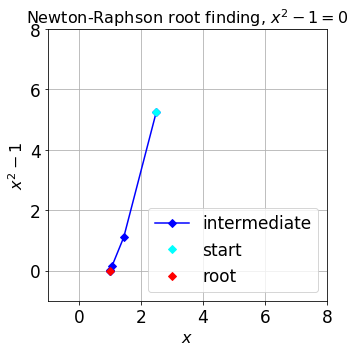

In [24]:
# Example test case: find root for the function f(x)=x^2-1

# definition of the function f(x)=x^2-1
def f(x):
    return np.array(x)**2-1.0
# corresponding derivative
def df(x):
    return 2.0*x

# initial guess, take x= 0.5
# required accuracy is acc = 1e-3
x_guess          = 2.5
acc              = 1e-3
ans              = NewtonRaphson(f,df,x_guess,acc,returnPoints=True)
x_root, (xs, vs) = ans

# Some feedback to the screen
feedback = r"Root found is x={0:1.2f} for which f(x)={1:1.4f}, tolerance was {2:1.4f}".format(x_root, f(x_root), acc)
print(feedback)

# plot result, including intermediate estimates of the roots
fig, ax = plt.subplots(1,1, figsize=(5, 5))

# plot the intermediate values
label = 'intermediate'
ax.plot(xs, vs, '-D', color='blue', label=label)

# plot starting value
label = 'start'
ax.plot(x_guess, f(x_guess), 'D', color='cyan', label=label)

# plot the root
label = 'root'
ax.plot(x_root, f(x_root), 'D', color='red', label=label)

ax.legend()

#ax.plot(ans[1][0],f(ans[1][0]),'D')
#ax.plot(ans[1][0],f(ans[1][0]))
ax.set_xlim([-1, 8.])
ax.set_ylim([-1, 8.])
ax.set_ylabel(r"$x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Newton-Raphson root finding, $x^2-1=0$")
ax.grid(True)


The cell below tests your implementation of the Newton-Raphson scheme.

It defines a new function, and test whether your implementation corerct identifies the root.

** 5 marks **

In [25]:
# this tests the implementation of Newton-Raphson on another function
def f(x): return np.log(x)-np.pi 
def df(x): return 1.0/(x)

assert np.isclose(NewtonRaphson(f,df,0.1,1e-10),np.exp(np.pi))
x,(xs,vs)=NewtonRaphson(f,df,0.05,1e-3,returnPoints=True)
assert len(xs)==9 and len(vs)==9

### 2) Secant method

Implement this method in the cell below

In [26]:
def secant(f,x0,x1,tolerance,returnPoints=False):
    
    '''
    finds a root of the equation f(x)=0, 
    Input:
       f: the function f(x) (must be a one-parameter python function)
       x0, x1: the starting values for the root finding (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
    x0 and x1 are the first two guesses (x0 != x1). Starting from these, the
    method determines subsequent improved guesses, x2, x3, ...
    
    The termination condition is
    
    | (x_{i+1}-x{i})/(x_{i+1}+x_{i}) | < tolerance,
    
    where the x_{i+1} and x_{i} are the two last guesses.
    If the method fails to converge after 1000 steps, we bail out
    with a NotConverging exception
    
    '''
    
        # YOUR CODE HERE
    error = 0.1
    
    x_i_minus = x0
    x_i = x1
    
    xs = [x_i_minus]
    vs = [f(x_i_minus)]
    
    count = 0
    
    while tolerance < error:
        
        xs.append(x_i)
        vs.append(f(x_i))
        
        
        x_i_plus = x_i - f(x_i)/( (f(x_i) - f(x_i_minus) ) / (x_i - x_i_minus) )
        
        error = abs( (x_i_plus-x_i)/(x_i + x_i_plus) )
        
        x_i_minus = x_i
        x_i = x_i_plus

        count += 1
    
    
        if count == 1000:
            return print('error')
    
    xs.append(x_i)
    vs.append(f(x_i))

    
    if returnPoints:
        return x_i ,(xs,vs)
    else:
        return x_i


Root found is x=1.00 for which f(x)=-0.0000, tolerance was 0.0010


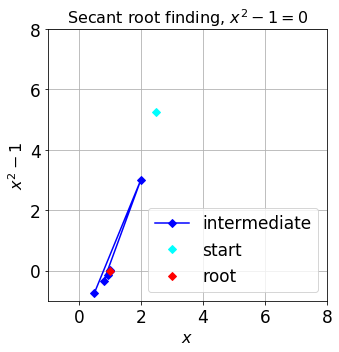

In [27]:
# Example test case: find root for the function f(x)=x^2-1

# definition of the function f(x)=x^2-1
def f(x):
    return np.array(x)**2-1.0
# corresponding derivative
def df(x):
    return 2.0*x

# initial guess, take x= 0.5
# required accuracy is acc = 1e-3
x_guess          = 2.5
x0               = 0.5
x1               = 2.0
acc              = 1e-3
ans              = secant(f, x0, x1, acc, returnPoints=True)
x_root, (xs, vs) = ans

# Some feedback to the screen
feedback = r"Root found is x={0:1.2f} for which f(x)={1:1.4f}, tolerance was {2:1.4f}".format(x_root, f(x_root), acc)
print(feedback)

# plot result, including intermediate estimates of the roots
fig, ax = plt.subplots(1,1, figsize=(5, 5))

# plot the intermediate values
label = 'intermediate'
ax.plot(xs, vs, '-D', color='blue', label=label)

# plot starting value
label = 'start'
ax.plot(x_guess, f(x_guess), 'D', color='cyan', label=label)

# plot the root
label = 'root'
ax.plot(x_root, f(x_root), 'D', color='red', label=label)

ax.legend()
ax.set_xlim([-1, 8.])
ax.set_ylim([-1, 8.])
ax.set_ylabel(r"$x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Secant root finding, $x^2-1=0$")
ax.grid(True)


The cell below tests your implementation of the secant method.

** 5 marks **

In [28]:
# this tests the implementation of secant root finder on another function
def f(x): return np.exp(x)-np.pi 
def df(x): return np.exp(x)

assert np.isclose(secant(f,0,2,1e-10),np.log(np.pi))
x,(xs,vs)=secant(f,0,2,1e-3,returnPoints=True)
assert len(xs)==8 and len(vs)==8

### 3) Bisection method

In [29]:
def bisect(f, x0, x1, tolerance, returnPoints=False):
    
    '''
    finds a root of the equation f(x)=0. 
    
    Input:
       f: the function f(x) (must be a one-parameter python function)
       x0, x1: guess that should straddle a root (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
    x0 and x1 are the first two guesses.
    They need to **straddle** a root, meaning f(x0)*f(x1)<0.
 
    It should not matter which one corresponds to a positive 
    value of f. 
    
    The iteration terminates when the length of the interval
    between the two last estimates is smaller than the tolerance,
    
    | x_{i+1} - x_{i} | < tolerance
    
    When this condition is satisfied, the function should return
    
    x_{i+2} = (x_{i+1}-x{i}) / 2
     
     
   The list of returned points should not include x0 or x1.

    '''
    error = 0.1
    
    
    a = x0 
    b = x1 
    
    xs = []
    vs = []
    
    count = 0
    
    if f(a)>0 and f(b)<0:
        print('F(a) is +ve')
        
        while tolerance < error:
        
            

            x_ii = (a + b)/2

            xs.append(x_ii)
            vs.append(f(x_ii))

            if f(x_ii)<0: 
                error = abs(x_ii - b)
                b = x_ii
            else:  
                error = abs(x_ii - a)
                a = x_ii



            count += 1

            if count == 1000:
                print('ERROR')


    
       
    xs.append(x_ii)
    vs.append(f(x_ii))

    
    if returnPoints:
        return x_ii ,(xs,vs)
    else:
        return x_ii


Root found is x=1.00 for which f(x)=-0.0000, tolerance was 0.0010


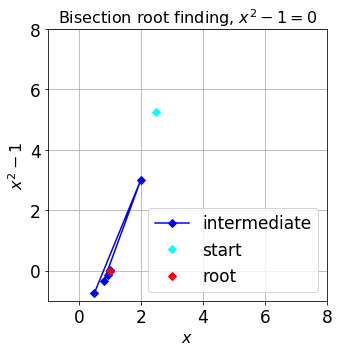

In [30]:
# Example test case: find root for the function f(x)=x^2-1

# definition of the function f(x)=x^2-1
def f(x):
    return np.array(x)**2-1.0
# corresponding derivative
def df(x):
    return 2.0*x

# initial guess, take x= 0.5
# required accuracy is acc = 1e-3
x_guess          = 2.5
x0               = 0.5
x1               = 2.0
acc              = 1e-3
ans              = secant(f, x0, x1, acc, returnPoints=True)
x_root, (xs, vs) = ans

# Some feedback to the screen
feedback = r"Root found is x={0:1.2f} for which f(x)={1:1.4f}, tolerance was {2:1.4f}".format(x_root, f(x_root), acc)
print(feedback)

# plot result, including intermediate estimates of the roots
fig, ax = plt.subplots(1,1, figsize=(5, 5))

# plot the intermediate values
label = 'intermediate'
ax.plot(xs, vs, '-D', color='blue', label=label)

# plot starting value
label = 'start'
ax.plot(x_guess, f(x_guess), 'D', color='cyan', label=label)

# plot the root
label = 'root'
ax.plot(x_root, f(x_root), 'D', color='red', label=label)

ax.legend()
ax.set_xlim([-1, 8.])
ax.set_ylim([-1, 8.])
ax.set_ylabel(r"$x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Bisection root finding, $x^2-1=0$")
ax.grid(True)


The cell below tests your implementation of the bisection method.

** 5 marks **

In [31]:
# this tests the implementation of bisection root finding on another function
def f(x): return np.cos(x)-np.sin(x) 
def df(x): return -np.sin(x)-np.cos(x)

assert np.isclose(bisect(f,0,2,1e-10),np.pi/4)
x,(xs,vs)=bisect(f,0,2,1e-3,returnPoints=True)
assert len(xs)==12 and len(vs)==12

F(a) is +ve
F(a) is +ve


### Finding the roots of an (unknown) function with more than one root

The hidden cell below defines a function f(x), and plots it over a given range in x.
Compute the first three roots of f(x) to 8 significant figures.

Enter your answers in the boxes below, in increasing order. The boxes will appear when you run the hidden cells below.


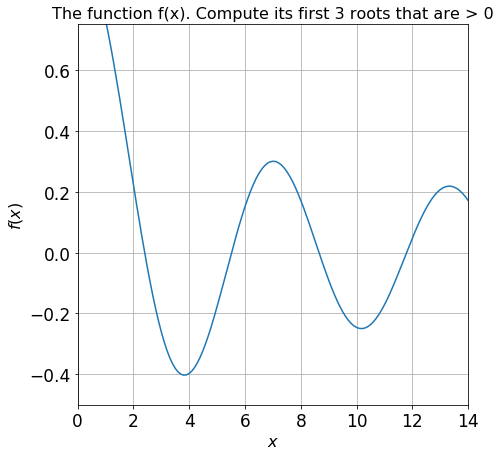

In [32]:
def f(x):
    return special.jv(0,x)

x = np.arange(0,100,0.1)    
fig, ax = plt.subplots(1,1, figsize=(7, 7))

ax.plot(x,f(x))

ax.set_xlim([0, 14])
ax.set_ylim([-0.5, 0.75])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x). Compute its first 3 roots that are > 0")
ax.grid(True)
    




In [33]:
# Use this cell to implement your solution
# YOUR CODE HERE

tolerance = 10**-8
#i
x0 = 1
x1 = 2.5

xx1 = bisect(f,x0,x1,tolerance,returnPoints=False)

#ii
x0 = 6
x1 = 5

xx2 = bisect(f,x0,x1,tolerance,returnPoints=False)

#iii
x0 = 13
x1 = 11

xx3 = bisect(f,x0,x1,tolerance,returnPoints=False)

print(xx1,xx2,xx3)


F(a) is +ve
F(a) is +ve
F(a) is +ve
2.4048255626112223 5.520078115165234 11.791534446179867


In [3]:
import mywidgets
root1=mywidgets.myFloatBox('root','q1','Root 1 = ','First root. (Specify the answer to 8 significant digits)')
root1.getWidget()



In [4]:
root2=mywidgets.myFloatBox('root','q2','Root 2 = ','Second root. (Specify the answer to 8 significant digits)')
root2.getWidget()

In [5]:
root3=mywidgets.myFloatBox('root','q3','Root 3 = ','Third root. (Specify the answer to 8 significant digits)')
root3.getWidget()


## Testing the rate of convergence of root finders

We are now going to look at the three methods and see how they compare, by finding zeroes of the function  f(x)=x−tanh(2x). The first few cells below illustrate the method. Run them to see what happens. Next you will be asked to examine the convergence for a different function.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


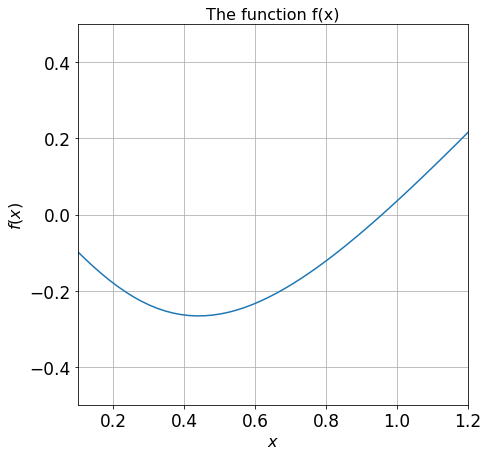

In [37]:
# define the function and compute its derivative
def f(x): 
    return x-np.tanh(2*x)
def df(x): 
    return 1.0-2.0/np.cosh(2*x)**2

# plot the function
fig, ax = plt.subplots(1,1, figsize=(7, 7))
xmin,xmax =0.1, 1.2
xs=np.linspace(xmin,xmax,50)
ax.plot(xs,f(xs))

#ax.plot.hlines(0,xmin,xmax)
ax.set_xlim([0.1,1.2])
ax.set_ylim([-0.5, 0.5])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x)")
ax.grid(True)
fig.show()



We now use all three methods to find the root use all three methods to compute the root (that is > 0). 
We also plot the relative error versus the iteration count (the number of function evaluations), 
to examine the rate of convergence

We also examine the **golden ratio** prediction for the Secant method


F(a) is +ve
[5.42495976e-01 4.57504024e-01 1.16237606e-01 6.86509575e-02
 3.33695508e-03 7.91463531e-05 1.01493707e-07 3.07043280e-12
 0.00000000e+00 0.00000000e+00]
<class 'numpy.ndarray'>
[0.45750402407726876, 0.1162376062239665, 0.0686509575003964, 0.003336955078225512, 7.914635310291018e-05, 1.014937074383937e-07, 3.070432796903333e-12, 0.0, 0.0]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:122: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:126: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(-17, 0)

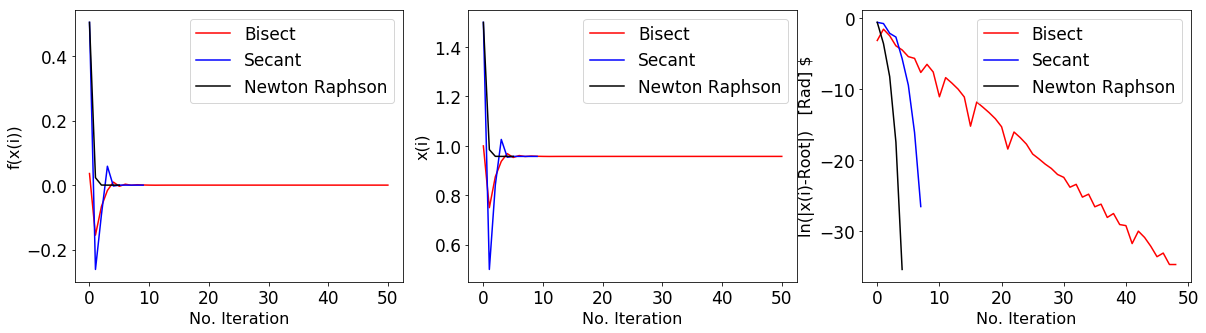

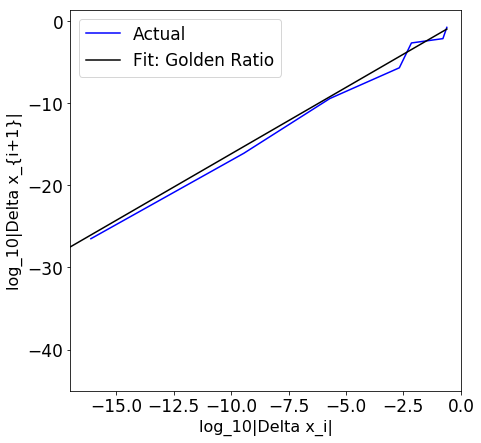

In [98]:
def f(x): 
    return x-np.tanh(2*x)
def df(x): 
    return 1.0-2.0/np.cosh(2*x)**2

# Make two figures
# Figure 1:
# Make a three panel plot
# Then, for each of the methods (NR, S & Bisection), plot the following
# panel (a): iteration count, i, vs f(x_i)
# panel (b): iteration count, i, vs x_i
# panel (c): iteration count, i, vs log_10(|x_i-root|)
#    make clear to distingsuih the methods, and add labels and legend
#    the approach to convergence of p~anel(c) was discussed in the lecture notes, it is
#      overplot in cyan lines that approximately fit the convergence rate for each

# Figure 2:
# make a single panel plot, to verify the "golden ratio" expression that characterises
#   convergence in the case of the Secant method


# approximate marking scheme
# Figure 1: 6 marks
#    each plot has labels and a legend    : 2 marks
#    the curves look OK                   : 2 marks
#    convergence curves are overplotted   : 2 marks

# Figure 2: 4 marks
#   panel has axis labels and a legend         : 2 marks
#   panel demonstrates the golden ratio scaling: 2 marks

# Create figure 1
# YOUR CODE HERE
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

tolerance = 1e-15
x0 = 1.5
x1 = 0.5



x , (xs, vs) = bisect(f, x0, x1, tolerance, returnPoints=True)
x1 , (xs1, vs1) = secant(f,x0,x1,tolerance,returnPoints=True)
x2 , (xs2, vs2) = NewtonRaphson(f,df,x0,tolerance,returnPoints=True)




lables = ['NewtonRaphson','Secant','Bisect']
color = ['black','blue','pink']



#i
xx = np.arange(0,len(vs),1)
ax[0].plot(xx, vs, color = 'red', label = 'Bisect')

xx1 = np.arange(0,len(vs1),1)

ax[0].plot(xx1, vs1, color = 'blue', label = 'Secant')











fig, ax1 = plt.subplots(1,1, figsize=(7, 7))

x_i = abs(xs1-x1)
print(x_i)
print(type(x_i))


new = []
for i in range(len(x_i)-1):
    new.append(x_i[i+1])

ax1.plot(np.log(x_i[:-1]),np.log(new), color='blue',label = 'Actual')
#|Delta x_{i+1}| proportional to |Delta x_i|^{1.618}

fit = x_i[:-1]**1.618
ax1.plot(np.log(x_i[:-1]),np.log(fit), color='black', label = 'Fit: Golden Ratio')
print(new)












xx2 = np.arange(0,len(vs2),1)
ax[0].plot(xx2, vs2, color = 'black', label = 'Newton Raphson')     

#ii
xx = np.arange(0,len(xs),1)
ax[1].plot(xx, xs, color = 'red', label = 'Bisect')

xx1 = np.arange(0,len(xs1),1)
ax[1].plot(xx1, xs1, color = 'blue', label = 'Secant')

xx2 = np.arange(0,len(xs2),1)
ax[1].plot(xx2, xs2, color = 'black', label = 'Newton Raphson') 

#iii
xs = list(map(lambda i: abs(i - x), xs))
xx = np.arange(0,len(xs),1)
ax[2].plot(xx, np.log(xs), color = 'red', label = 'Bisect')

xs1 = list(map(lambda i: abs(i - x1), xs1))

xx1 = np.arange(0,len(vs1),1)
ax[2].plot(xx1, np.log(xs1), color = 'blue', label = 'Secant')

xs2 = list(map(lambda i: abs(i - x2), xs2))
xx2 = np.arange(0,len(vs2),1)
ax[2].plot(xx2, np.log(xs2), color = 'black', label = 'Newton Raphson') 


ax[0].legend()
ax[1].legend()
ax[2].legend()
    
ax[0].set_ylabel("f(x(i))")
ax[0].set_xlabel("No. Iteration")   

ax[1].set_ylabel("x(i)")
ax[1].set_xlabel("No. Iteration") 

ax[2].set_ylabel(r"ln(|x(i)-Root|)   [Rad] $")
ax[2].set_xlabel("No. Iteration") 

fig.show()

# Notice from the plot that the way the iteration is stopped in the Newton-Raphson solver, 
#     we would need to perform one iteration more
# Also compare the convergence rate with the expectation depending on the size of the interval (see the cyan curves)
ax1.set_ylabel("log_10|Delta x_{i+1}|")
ax1.set_xlabel("log_10|Delta x_i|") 
ax1.legend()
ax1.set_xlim(-17,0)

# Figure 2: 
#    plot log_10|Delta x_i| vs log_10|Delta x_{i+1}| for the secant method
#    compare to the "golden ratio" prediction, |Delta x_{i+1}| proportional to |Delta x_i|^{1.618}
#fig, ax1 = plt.subplots(1,1, figsize=(7, 7))

#x1 , (xs1, vs1) = secant(f,x0,x1,tolerance,returnPoints=True)









The function $f(x)=x^5-3x^2+3$ has a root near $x=0.8$. Use the Newton-Raphson scheme to find the root,
starting from the guess $x=-0.1$. 

Determine the required minimum number of iterations, $i$, (evaluations of $f(x_i)$), so that $|f(x_i)|<10^{-6}$?

Use the cell below the implement your test

**5 marks **



In [61]:
# Use this cell to compute the answer

# YOUR CODE HERE
def f(x):
    return x**5 - 3*x**2 + 3

def df(x):
    return 5*x**4 - 6*x 

x0 = -0.1
tolerance = np.linspace(10**-3,0.01,10000)
tolerance = np.flip(tolerance)
error = 1
i = 0
while error >10**-6:
    
    x2 , (xs2, vs2) = NewtonRaphson(f,df,x0,tolerance[i],returnPoints=True)
    error = abs(f(x2))
    #print(tolerance[i])
    #print(i)
    i += 1
    
    
x2 , (xs2, vs2) = NewtonRaphson(f,df,x0,tolerance[i-1],returnPoints=True)    

print('The root = ',x2, '. Iterations = ',len(xs2),' f(X) = ', f(x2))
print('#########################################')
print()
print('NUMBER OF ITERATIONS: ', len(xs2))
print()
print('#########################################')

The root =  -0.8976329144656358 . Iterations =  12  f(X) =  -6.256634099699454e-08
#########################################

NUMBER OF ITERATIONS:  12

#########################################


In [6]:
from IPython.display import display, HTML
display(HTML('<hr>'))

Examine root finding for the function $f(x)=x^3+3x^2+x+1$ to answer the question below.

Use the cell below to find the answers.


**5 marks**

In [7]:
import mywidgets
mcb=mywidgets.myCheckBoxSet('root','q5',
    "Next we consider the function $f(x)=x^3+3x^2+x+1$," 
                            "which of the following statements are true for a tolerance of $10^{-6}$?",[
    "The Newton-Raphson method converges for $x_0=0$ in less than 10 iterations",
    "The Newton-Raphson method converges faster for $x_0=-3$ than for $x_0=-2$",
    "The secant method is quicker than the bisection method with $x_0=-3$ and $x_1=-2$"
])
mcb.getWidget()

In [42]:
# Use this cell to answer the questions
# YOUR CODE HERE
def f(x):
    return x**3 - 3*x**2 + x +1

def df(x):
    return 3*x**2 - 6*x + 1 

# For i and ii
x0 = -2
tolerance = 10**-9
    
x2 , (xs2, vs2) = NewtonRaphson(f,df,x0,tolerance,returnPoints=True)

print('Attempt 1: The root = ',x2, '. Iterations = ',len(xs2),' f(X) = ', f(x2))

# For ii
x0 = -3
tolerance = 10**-6
    
x2 , (xs2, vs2) = NewtonRaphson(f,df,x0,tolerance,returnPoints=True)

print('Attempt 2: The root = ',x2, '. Iterations = ',len(xs2),' f(X) = ', f(x2))



# For iii
print('')

x0 = -3
x1 = -2

print(f(x0),f(x1))
tolerance = 10**-6
    
#x , (xs, vs) = bisect(f, x0, x1, tolerance, returnPoints=True)


print('Bisection: The root = ',x, '. Iterations = ',len(xs),' f(X) = ', f(x))

x1 , (xs1, vs1) = secant(f,x0,x1,tolerance,returnPoints=True)

print('Secant: The root = ',x1, '. Iterations = ',len(xs1),' f(X) = ', f(x1))




Attempt 1: The root =  -0.41421356237309503 . Iterations =  8  f(X) =  0.0
Attempt 2: The root =  -0.41421356237309503 . Iterations =  9  f(X) =  0.0

-56 -21
Bisection: The root =  0.9575040240772688 . Iterations =  49  f(X) =  0.08491520802386665
Secant: The root =  -0.414213562374285 . Iterations =  11  f(X) =  -4.759970195777896e-12


In [43]:
from IPython.display import display, HTML
display(HTML('<hr>'))

## Root finding when there are many roots

So far we have plotted the function to find starting points for root finding. This is not always practical: consider the case where in a larger calculation you need to find roots of a function, however the function changes during the calculation (for example it depends on a parameter that changes during the calculation). Another case is where the function has very many roots. There is no general way of finding the root(s) in such cases. However, suppose you know the interval in which you are looking for roots, say the interval $[0,1]$. We could split-up this interval in smaller intervals, find a root in each interval, and collect all the roots. We could then redo the calculation with smaller intervals. If we find the same set of roots, maybe we found all of them.

In [44]:
# Here we define the function f(x)
def f(x):
    return special.jv(1,x)

In [8]:
import mywidgets
intwidget6 = mywidgets.myIntBox('root','q6','Number=','Enter the number of roots in interval ]0,44[')
intwidget6.getWidget()


In [9]:
root6=mywidgets.myFloatBox('root','q6','Root = ',
                           'Largest root in this interval (Specify the answer to 5 significant digits)')
root6.getWidget()

In [47]:
# Use this cell to obtain the answer

# YOUR CODE HERE
roots = [0]
x = 50
x_range = np.linspace(0,44,x)

for i in range(len(x_range)):
    x0 = x_range[i]   
    if i<(x-1):
        x1 = x_range[i+1]
          
    roots.append(secant(f,x0,x1,tolerance,returnPoints=False))

    
roots = list(np.around(np.array(roots),5))


simple = [] 

for i in range(1,len(roots)):
    if i ==0:
        simple.append(roots[i])
        
    elif roots[i] != roots[i-1] and roots[i]<44 and roots[i]>0:
        simple.append(roots[i])
        


ff= []
for i in range(len(simple)):
    ff.append(f(simple[i]))

rootss=[]
for i in range(len(ff)):
    if abs(ff[i])<1e-5:
        rootss.append(simple[i])
        
def uniq(input):
    output = []
    for x in input:
        if x not in output:
            output.append(x)
    return output
final = uniq(rootss)
        
        

print(final)
print('LENGTH ', len(final))
print(f(41.6170))
  

[3.83171, 7.01559, 10.17347, 13.32369, 16.47063, 19.61586, 22.76008, 25.90367, 29.04683, 32.18968, 35.33231, 38.47477, 41.61709]
LENGTH  13
1.1651119812544818e-05


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


# Part 2: Numerical integration

## Integration

Implement the Newton-Cotes, Trapezoidal and Simpson rule integration methods in the following cells. Each integrator should take the following arguments:

- `f`: the function to be integrated
- `xmin` and `xmax`: the lower and upper limits of integration
- `N`: the number of subdivisions of the interval, for `N` subdivisions we will evaluate the function `f` at `N+1` locations (including at `xmin` and `xmax`)  

Hint: You might want to look at the function `linspace` in the numpy module... 

### 1) Newton-Cotes

Implement the Newton-Cotes integration method in the next cell.

In [48]:
def NCintegrate(f,xmin,xmax,N):
    ''' This function performs a Newton-Cotes integration of function'''
    # YOUR CODE HERE
    a = xmin
    b = xmax
    delta_x = (b-a)/N
    
    total = 0
    for i in range(N):
        tt = f(a+i*delta_x)*delta_x
        total += tt
        
    return total

The next cell tests your Newton-Cotes implementaton, by calculating the following numerical integrals, using **500** segments.

 - $\int_0^1 x^{1/2}\,{\rm d}x$

 - $\int_0^1 exp(-x^2)\,{\rm dx}$

**5 marks**


In [49]:
# test of the NC method
def test_sqrt(x): return np.sqrt(x)
def test_gauss(x): return np.exp(-x**2)

# #
# print(NCintegrate(test_gauss,0,1,500))
# print(np.sqrt(np.pi)*special.erf(1.)/2)
# print(NCintegrate(test_sqrt,0,1,500))
# print(2./3.)
# #

assert np.isclose(NCintegrate(test_sqrt,0,1,500),0.665648239)
assert np.isclose(NCintegrate(test_gauss,0,1,500),0.7474560081182616)

### 2) Trapezoidal rule

Implement the trapezoidal rule integration method in the next cell.

In [50]:
def Trapezoidal(f,xmin,xmax,N):
    # YOUR CODE HERE
    a = xmin
    b = xmax
    delta_x = (b-a)/N
    
    total = 0
    for i in range(N):
        tt = f(a+i*delta_x)*delta_x 
        total += tt
    return total+ delta_x*0.5*(f(b)-f(a))

The next cell tests trapezoidal rule implementaton, by calculating the following numerical integrals, using **N=500** segments

  - $\int_0^{10} \sin(x)^{2}\,{\rm d}x$

  - $\int_0^1 \exp(-x^2)\,{\rm dx}$

**5 marks**

In [51]:
# test of the Trapezoidal method
def test(x): return np.sin(x**2)

# # 
# print(Trapezoidal(test_sqrt,0,1,500))
# print(Trapezoidal(test_gauss,0,1,500))
# #
assert np.isclose(Trapezoidal(test_sqrt,0,1,500),0.6666482394240997)
assert np.isclose(Trapezoidal(test_gauss,0,1,500),0.7468238875594331)

### 3) Simpson's rule

Implement Simpson's rule integration method in the next cell.

In [52]:
def Simpson(f,xmin,xmax,N):
    # YOUR CODE HERE]
    total = 0
    p = 4
    a = xmin
    b = xmax
    delta_x = (b-a)/N
    for i in range(1,N):
        if i%2 == 0:
            p=2
        else:
            p=4
            
        total += p*f(xmin + i*delta_x)
        
    return (total+f(xmin)+f(xmax))*delta_x/3
        
    

The next cell tests your Simpson's rule implementation, using **N=500** segments.
**N needs to be even**

  - $\int_2^{5} 1/x\,{\rm d}x$

  - $\int_0^1 exp(-x^2)\,{\rm dx}$

**5 marks **

In [53]:
def test_oneover(x): return 1.0/x

#
# print(Simpson(test_oneover,2,5,500))
# print(np.log(5/2))
# print(Simpson(test_gauss,0,1,500))
#
assert np.isclose(Simpson(test_oneover,2,5,500),0.9162907318767844)
assert np.isclose(Simpson(test_gauss,0,1,500),0.7468241328125584)

### 4) Test of integration

Integate the function $f$, defined below, over the interval $[0,10]$. Enter your answer in the box below.
It should be accurate to 7 significant digits.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


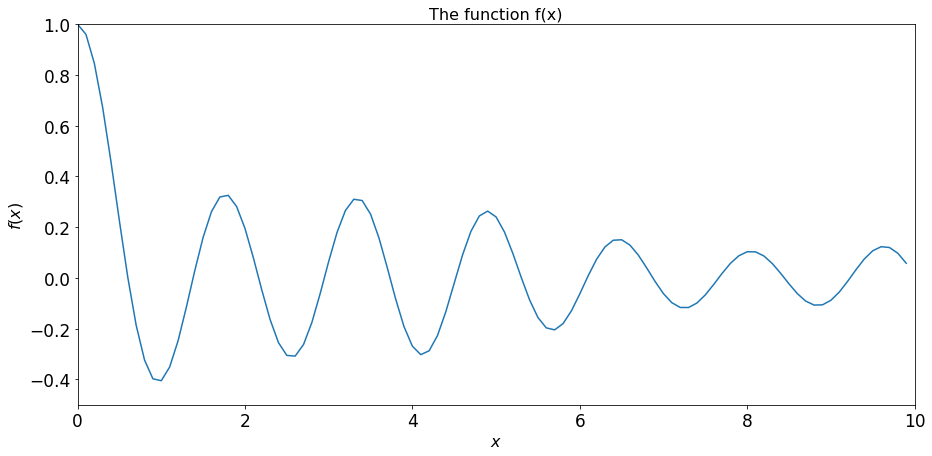

In [54]:
# Function to be integrated
def f(x):
    return np.exp(special.jv(3,x)) * special.jv(0,4*x)
a   = 0
b   = 10

fig, ax = plt.subplots(1,1, figsize=(15, 7))

ax.set_xlim([0, 10])
ax.set_ylim([-0.5, 1.0])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x)")

x   = np.arange(a,b,b/100)
ax.plot(x, f(x))
fig.show()

In [10]:
import mywidgets
int_test = mywidgets.myFloatBox('integration','q1','Integral','Result of numerical integration. Specify the answer to 7 significant digits')
int_test.getWidget()

In [56]:
# Use this cell to calculate your answer
print(Simpson(f,a,b,100000))
# YOUR CODE HERE


0.2835267455586458


In [57]:
# HIDDEN TESTS
answer   = 0.2835267523610387                   # correct answer
reply    = int_test.widgets[0].value            # student's answer
accuracy = np.abs(reply-answer)/answer * 1e6    # relative error
# print(reply, answer, accuracy)
assert np.isclose(accuracy,0,atol=1)

# Part 3: Numerical differentiation

We will experiment with two python routines to obtain numerical derivatives. One uses numpy.gradient, the other fits the function with a spline, in whcih can you can compute the derivative of the spline. The next cell illustrates their use.


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


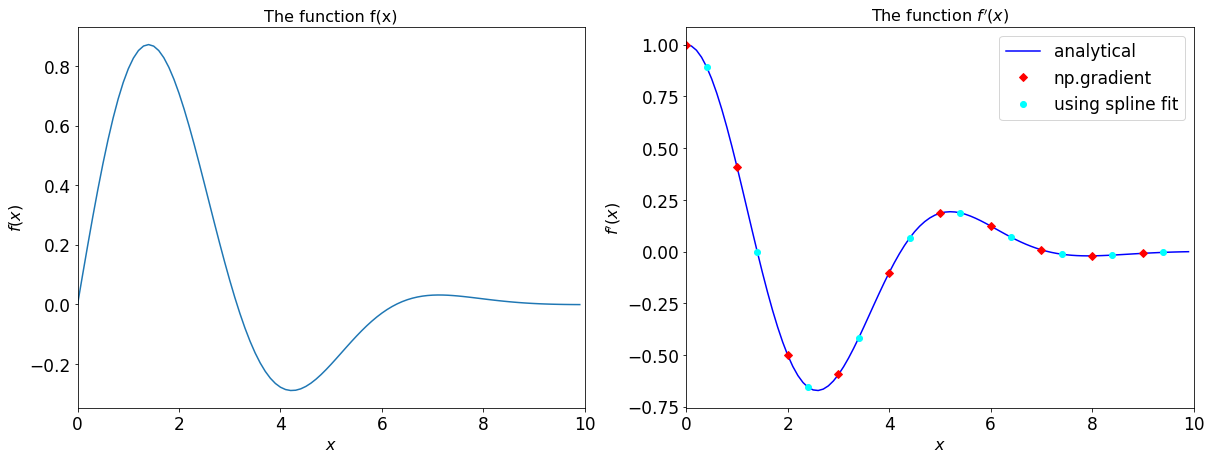

In [58]:
# Example of numerical differentiation. Here we use a function with a known derivative - as a test

# The function f(x)
def f(x):
    return np.exp(-(x/4)**2) * np.sin(x)

# Its analytical derivative
def dfx(x):
    return (-2*x/4**2 * np.sin(x) + np.cos(x)) * np.exp(-(x/4)**2)

# values of x
x = np.arange(0, 10, 0.1)

# first method: using np.gradient
vals  = f(x)
dfdx1 = np.gradient(vals, x)

# second method: using spline fitting
from scipy.interpolate import UnivariateSpline         # import the scipy routine
spl            = UnivariateSpline(x, vals, k=4, s=0)   # create spline fit
dfdx2_func     = spl.derivative(n=1)                   # create the first derivative of the spline
dfdx2          = dfdx2_func(x)                         #    and evaluate it at the x-values t

fig, ax = plt.subplots(1, 2, figsize=(20, 7))



ax[0].plot(x, f(x))

ax[0].set_xlim([0, 10])
#ax.set_ylim([-0.5, 1.0])
ax[0].set_ylabel(r"$f(x)$")
ax[0].set_xlabel(r"$x$")
ax[0].title.set_text(r"The function f(x)")

ax[1].set_xlim([0,10])
ax[1].plot(x, dfx(x), color='blue', label='analytical')
#
ax[1].plot(x[0:-1:10], dfdx1[0:-1:10], 'D', color='red', label='np.gradient')

#
ax[1].plot(x[4:-1:10], dfdx2[4:-1:10], 'o', color='cyan', label='using spline fit')

ax[1].set_ylabel(r"$f'(x)$")
ax[1].set_xlabel(r"$x$")
ax[1].legend()
ax[1].title.set_text(r"The function $f'(x)$")

fig.show()

## Play area: Convergence rates

We compare the convergence rates of the integrators.

This part has no assignment, it is only a place to play. In the following cells we implement higher order integration routines. We use these to compute the numerical integral of some functions, varying the number of segments. This allows you to contrast the rate of convergence of the schemes.

Run the cells below. Can you provide a rule of thumb to the question: ** does the functional shape determine which integrator gives the most accurate answer for a given number of function evaluations**?



In [59]:
# Define third, fourth and fifth-order integrators
from itertools import cycle

def i3(f,xmin,xmax,Nin):
    N=Nin-(Nin%4)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([14,32,12,32])
    l=list(next(c) for i in range(N))
    l.append(7)
    l[0]=7
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*2.0/45.0

def i4(f,xmin,xmax,Nin):
    N=Nin-(Nin%5)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([38,75,50,50,75])
    l=list(next(c) for i in range(N))
    l.append(19)
    l[0]=19
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*5.0/288.0
def i5(f,xmin,xmax,Nin):
    N=Nin-(Nin%6)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([82,216,27,272,27,216])
    l=list(next(c) for i in range(N))
    l.append(41)
    l[0]=41
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*1.0/140.0

In [ ]:
# for each method, run the integrator for a range of step sizes, and compute the error
# make a plot contasting the convergence with increasing number of steps, N
methods=[
    (NCintegrate,'NC'),
    (Trapezoidal,'Trap'),
    (Simpson,'Simpson'),
    (i3,'cubic'),
    (i4,'quartic'),
    (i5,'5th order')
]

def makeErrorPlot(f,xmin,xmax,trueValue):
    '''This function plots the error as a function of the number of subdivisions for the 
       integration methods defined above.'''    
    def error(IntFn,N):
        est=IntFn(f,xmin,xmax,N)
        return abs(est-trueValue)

    Ns=[4**n for n in range(3,12)]
    for (fn,label) in methods:    
        errors=[error(fn,N) for N in Ns]
        plt.plot(Ns,errors,label=label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$N$')
    plt.ylabel('error')
    plt.legend()

In [ ]:
# f(x) = x^7: higher-order methods converge much faster
def xto7(x):
    return x**7

makeErrorPlot(xto7,0.0,1.0,0.125)

In [ ]:
# f(x)=2-4x: not surprisingly, higher order schemes all converge at the same rate for this linear function
def linear(x):
    return 2.0-4.0*x 
makeErrorPlot(linear,0.0,1.0,0)

In [ ]:
# f(x) = 2-4x+3x^2: again, once method is of high enough order, all converge at the same rate. Note the onset of round-off errors set
def quadratic(x):
    return 2.0-4.0*x+3.0*x**2 
makeErrorPlot(quadratic,0.0,1.0,1.0)

In [ ]:
def discontinous(x):
    return x*np.sin(x)/abs(np.sin(x))

xs=np.linspace(1,1+10*np.pi,2000)
plt.plot(xs,discontinous(xs))

In [ ]:
# If the function is discontinuous, going to high-orders does not improve convergence
makeErrorPlot(discontinous,1,1+10*np.pi,5*(2*np.pi-np.pi**2))

In [ ]:
def complicated(x):
    return np.sqrt(x+np.cos(5*x)**2)/(1+(x-0.3)**2)

makeErrorPlot(complicated,0.0,1.0,0.85683203415819954517417626994)

In [ ]:
def exponential(x):
    return np.exp(x)

makeErrorPlot(exponential,0.0,1.0,np.exp(1)-1)

In [ ]:
def exponential2(x):
    return np.exp(1.0/x)/(x**2)

makeErrorPlot(exponential2,1.0,4.0,-np.exp(1.0/4.0)+np.exp(1.0))

In [ ]:
def sqrt1(x):
    return np.sqrt(1.0-x**2)

makeErrorPlot(sqrt1,0.0,1.0,np.pi/4.0)